# 1. InChI issue
* https://chemistry.stackexchange.com/questions/34563/pubchem-inchi-smiles-and-uniqueness
* The Inchi identifier starting with <code>Inchi=1S/...</code> is a standard Inchi. In the standard InchI, the InchI identifier "must be the same for any arrangement of moving hydrogen atoms"
* Starting with <code>InchI=1/...</code> is considered non-standard InchI, including an additional fixed-hydrogen layer starting with <code>/f</code>.
* The standard InchI generation structure is different from SMILES, while the non-standard InchI generation structure is the same as SMILES. The non-standard InchI is generated using <code>Chem.MolToInchi(mol, options='/FixedH')</code>

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from copy import deepcopy

In [2]:
def check_mol_is_same(mol1, mol2):
    return mol1.GetNumAtoms() == mol2.GetNumAtoms() and mol1.HasSubstructMatch(mol2, useChirality=True) and mol2.HasSubstructMatch(mol1, useChirality=True)

In [3]:
SMILES = 'CC1(C(=O)NC(C(=O)N2CCCC2C(=O)NC(C(=O)N1)CCCCCC(=O)C3CO3)CC4=CC=CC=C4)C'
#SMILES = 'CC[C@H](C)C1C(=O)N[C@H](C(=O)N[C@@H](C(=O)NC(C(=O)NCC[C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N1)CC(C)C)CCN)NC(=O)C(CCN)NC(=O)C([C@@H](C)O)NC(=O)[C@H](CCN)NC(=O)CCCCC(C)C)[C@@H](C)O)CCN)CCN'
SMILES

'CC1(C(=O)NC(C(=O)N2CCCC2C(=O)NC(C(=O)N1)CCCCCC(=O)C3CO3)CC4=CC=CC=C4)C'

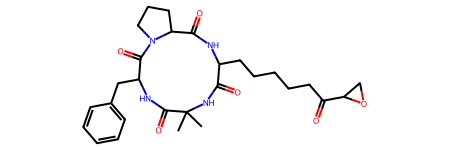

In [4]:
mol = Chem.MolFromSmiles(SMILES)
mol

In [5]:
standard_inchi = Chem.MolToInchi(mol)
non_standard_inchi = Chem.MolToInchi(mol, options='/FixedH')
print('Standard_inchi:', standard_inchi)
print('Non-standard_inchi:', non_standard_inchi)

Standard_inchi: InChI=1S/C28H38N4O6/c1-28(2)27(37)30-20(16-18-10-5-3-6-11-18)26(36)32-15-9-13-21(32)25(35)29-19(24(34)31-28)12-7-4-8-14-22(33)23-17-38-23/h3,5-6,10-11,19-21,23H,4,7-9,12-17H2,1-2H3,(H,29,35)(H,30,37)(H,31,34)
Non-standard_inchi: InChI=1/C28H38N4O6/c1-28(2)27(37)30-20(16-18-10-5-3-6-11-18)26(36)32-15-9-13-21(32)25(35)29-19(24(34)31-28)12-7-4-8-14-22(33)23-17-38-23/h3,5-6,10-11,19-21,23H,4,7-9,12-17H2,1-2H3,(H,29,35)(H,30,37)(H,31,34)/f/h29-31H


[07:22:11] WARNING: Omitted undefined stereo

[07:22:11] WARNING: Omitted undefined stereo



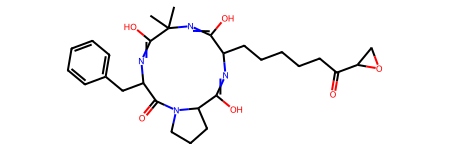

In [6]:
mol_from_standard_inchi = Chem.MolFromInchi(standard_inchi)
mol_from_standard_inchi

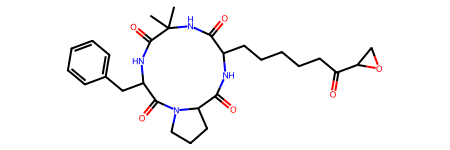

In [7]:
mol_from_non_standard_inchi = Chem.MolFromInchi(non_standard_inchi)
mol_from_non_standard_inchi

In [8]:
check_mol_is_same(mol, mol_from_standard_inchi)

False

In [9]:
check_mol_is_same(mol, mol_from_non_standard_inchi)

True

# 2. PDBblock issue
* PDBblock requires the preservation of chirality through spatial structure, so when converting other formats to PDB, a 3D conformation needs to be created first;
* <code>AllChem.EmbedMolecule(mol, AllChem.ETKDG())</code> will generate new three-dimensional information;
* The consistency of molecules can be determined by whether InChI (non-standard form) is the same, or through substructure comparison;

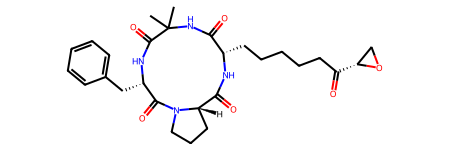

In [10]:
mol = Chem.MolFromSmiles('CC1(C)NC(=O)[C@H](CCCCCC(=O)[C@@H]2CO2)NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2ccccc2)NC1=O')
mol

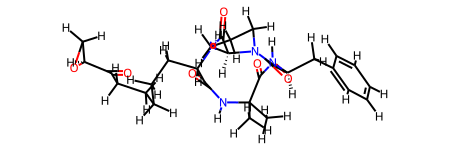

In [11]:
temp = Chem.AddHs(mol)
AllChem.EmbedMolecule(temp, AllChem.ETKDG())
temp

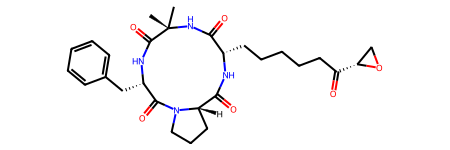

In [12]:
pdbblock = Chem.MolToPDBBlock(temp)
mol_from_pdbblock = Chem.MolFromPDBBlock(pdbblock, sanitize=True, removeHs=True, proximityBonding=True)
mol_from_pdbblock.RemoveAllConformers() # 去除3D构象
mol_from_pdbblock

In [13]:
mol_from_pdbblock.HasSubstructMatch(mol, useChirality=True), mol.HasSubstructMatch(mol_from_pdbblock, useChirality=True)

(True, False)

## Use InChI

In [14]:
Chem.MolToInchi(mol, options='/FixedH') == Chem.MolToInchi(mol_from_pdbblock, options='/FixedH')

True

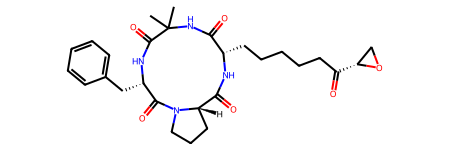

In [15]:
mol_from_inchhi = Chem.MolFromInchi(Chem.MolToInchi(mol_from_pdbblock, options='/FixedH'))
mol_from_inchhi

In [16]:
mol_from_inchhi.HasSubstructMatch(mol, useChirality=True), mol.HasSubstructMatch(mol_from_inchhi, useChirality=True)

(True, True)